<a href="https://colab.research.google.com/github/pbrugimail/PB-Public/blob/master/PB19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supervised Learning - a few examples
(Pierre Brugière - October 2022)

Code coming mainly from: "Python for Data Science (for dummies)" JP Mueller, Luca Massaron John Wiley and Sons 2019 https://www.wiley.com/en-us/Python+for+Data+Science+For+Dummies,+2nd+Edition-p-9781119547662#downloads-section and from the sklearn tutorials https://scikit-learn.org/stable/modules/svm.html

## Boston data set

In [133]:
from sklearn.datasets import load_boston
import random
from random import shuffle

boston = load_boston()
random.seed(0) # Creates a replicable shuffling
new_index = list(range(boston.data.shape[0]))
shuffle(new_index) # shuffling the index
X, y = boston.data[new_index], boston.target[new_index] # takes the values in the order of the new_index
print(X.shape, y.shape, boston.feature_names) # X is a np.array of shape (506,13) 
# print(boston.DESCR) # description of the database

(506, 13) (506,) ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [134]:
boston.feature_names.shape

(13,)

## Non-linear transformations

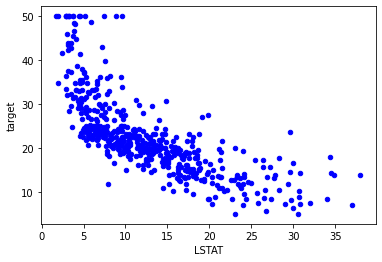

In [135]:
# Examination of the impact of a particular variable 
import pandas as pd
df =pd.DataFrame(X,columns=boston.feature_names) #transform into a pdDataFrame
# boston.feature_names is a np.array (13,)
df['target'] =y
%matplotlib inline
ax = df.plot(kind='scatter', x='LSTAT', y='target', c='b')

In [136]:
# Test of significance and choice of the best transformation
import numpy as np
from sklearn.feature_selection import f_regression
single_variable = df['LSTAT'].values.reshape(-1, 1) # transform from (506,) into (506,1)
F, pval = f_regression(single_variable, y) # y is a np(506,1)
print('F score for the original feature %.1f' % F)
F, pval = f_regression(np.log(single_variable),y)
print('F score for the transformed feature %.1f' % F)


F score for the original feature 601.6
F score for the transformed feature 1000.2


# Regularised regressions (Gridsearch and K-fold crossvalidation)

These models contained some hyperparameters which define the regularisation. These hyperparameters are searched using GridSearch and the best peforming hyperparameters are determined by Crossvalidation. The hyperparameters selected are those who achieve the best average score on the K-fold.

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score, KFold
regression = LinearRegression(normalize=True)
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

## Ridge regression

Objective = MSE + α * (sum of square of coefficients) 

α is the hyperparameter

Best parameters: {'alpha': 10.0}
CV MSE of best parameters: 24.231


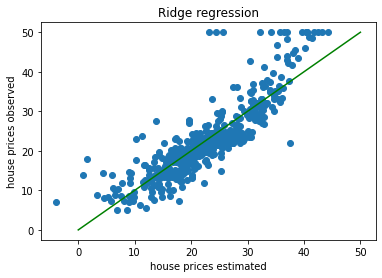

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # calculate the parameters for renormalisation
ridge = Ridge()
search_grid = {'alpha':np.logspace(-5,2,8)} # search values for the optimal penalisation parameter alpha
search = GridSearchCV(estimator=ridge, 
                      param_grid=search_grid, 
                      scoring='neg_mean_squared_error', 
                      refit=True, cv=10) # will calculate the parameters on the whole sample 
                      # with the best hyperparameters found on the K-folds
search.fit(X,y)
print('Best parameters: %s' % search.best_params_)
score = abs(search.best_score_)
print('CV MSE of best parameters: %.3f' % score)
# graph real value vs estimated value 
search.predict(X)
Pred = search.predict(X)
plt.scatter(Pred,y)
plt.title("Ridge regression")
plt.xlabel('house prices estimated')
plt.ylabel('house prices observed')
plt.plot([0, 50], [0, 50],color="green")
plt.show()

## Lasso regression

Objective =  MSE + α * (sum of absolute value of coefficients)

α is the hyperparameter

Best parameters: {'alpha': 0.0019306977288832496}
CV MSE of best parameters: 24.247
coeff of the regression:  [-0.92138716  1.06833614  0.11361958  0.6838813  -2.03725145  2.68046166
  0.00852091 -3.09603147  2.60036332 -2.01378989 -2.05522504  0.84759354
 -3.73760252]


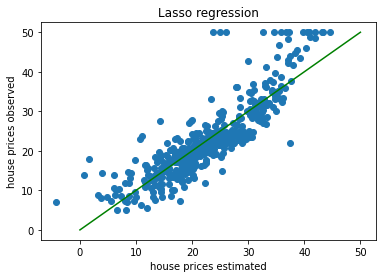

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
lasso = Lasso(tol=0.05, selection='random') #tol control the degree of precision for the minimum
search_grid = {'alpha':np.logspace(-5,3,8)}
search = GridSearchCV(estimator=lasso, 
                      param_grid=search_grid, 
                      scoring='neg_mean_squared_error', 
                      refit=True, cv=10)
search.fit(X,y)
print('Best parameters: %s' % search.best_params_)
score = abs(search.best_score_)
print('CV MSE of best parameters: %.3f' % score)
print ('coeff of the regression: ' , search.best_estimator_.coef_)
# graph real value vs estimated value 
search.predict(X)
Pred = search.predict(X)
plt.scatter(Pred,y)
plt.title("Lasso regression")
plt.xlabel('house prices estimated')
plt.ylabel('house prices observed')
plt.plot([0, 50], [0, 50],color="green")
plt.show()

In [28]:
# Finding the most relevant variables
lasso = Lasso(alpha=0.01)
lasso.fit(X,y)
print(df.columns[0:13][np.abs(lasso.coef_)>0.0001].values) # normalized variables with the most significant coeff

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B'
 'LSTAT']


## Elasticnet (Lasso + Ridge)

Objective =  MSE + α * (sum of square of coefficients) + l1_ratio * (sum of absolute value of coefficients)

α and l1_ratio are the hyperparameters

Best parameters: {'alpha': 0.01, 'l1_ratio': 0.75}
CV MSE of best parameters: 24.213


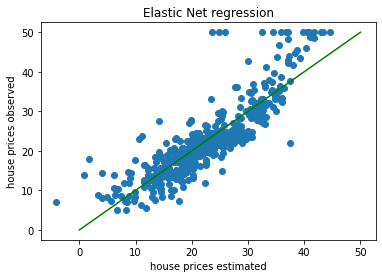

In [168]:
from sklearn.linear_model import ElasticNet
X = StandardScaler().fit_transform(X)
elastic = ElasticNet(selection='random')
search_grid = {'alpha':np.logspace(-4,3,8), 
               'l1_ratio': [0.10 ,0.25, 0.5, 0.75]}
search = GridSearchCV(estimator=elastic, 
                      param_grid=search_grid, 
                      scoring='neg_mean_squared_error', 
                      refit=True, cv=10)
search.fit(X,y)
print('Best parameters: %s' % search.best_params_)
score = abs(search.best_score_)
print('CV MSE of best parameters: %.3f' % score)
# graph real value vs estimated value 
search.predict(X)
Pred = search.predict(X)
plt.scatter(Pred,y)
plt.title("Elastic Net regression")
plt.xlabel('house prices estimated')
plt.ylabel('house prices observed')
plt.plot([0, 50], [0, 50],color="green")
plt.show()

# Stochastic Gradient Descent
 SGD optimizes the coefficients one observation at a time (or potentially batch by batch) if the memory cannot hold all the data in one go. The number of epochs is the number of times the whole data is passed through the SGD.

For SGD to be more robust it is usually advised to use as the loss function modified_huber for classification or huber for regression.



## SGD applied to regression models

Regularised regression linear models can be optimised according to the SGD algorithm

In [163]:
# SGD for regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

SGD = SGDRegressor(loss='squared_error', 
                   penalty='l2', #ridge penalisation
                   alpha=0.0001, 
                   l1_ratio=0.15, #lasso penalisation
                   max_iter=2000, # number of epochs
                   random_state=1)
scaling = StandardScaler()
scaling.fit(X) # scaling is determined from X
scaled_X = scaling.transform(X)
cv = cross_val_score(SGD, scaled_X, y, 
         scoring='neg_mean_squared_error', 
         cv=crossvalidation) # cv contains the MSE for the K-fold
score = abs(np.mean(cv))
print('CV MSE: %.3f' % score)

CV MSE: 23.948


In [164]:
# Measuring the improvements for each SGD of an Elasticnet model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_tr, X_t, y_tr, y_t = train_test_split(scaled_X, y, 
                                        test_size=0.20, 
                                        random_state=2)
SGD = SGDRegressor(loss='squared_error', 
                   penalty='l2', 
                   alpha=0.0001, 
                   l1_ratio=0.15, 
                   max_iter=2000,
                   random_state=1)
improvements = list()
for z in range(10000):
    SGD.partial_fit(X_tr, y_tr) # approximate after each SGD
    score = mean_squared_error(y_t, SGD.predict(X_t))
    improvements.append(score)

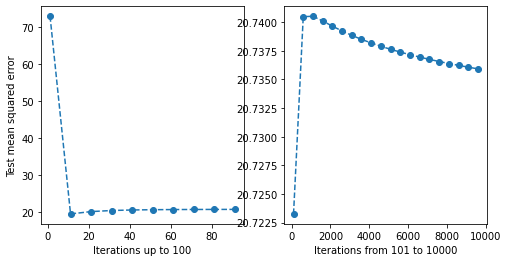

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
range_1 = range(1,101,10) # every 10 from 1 ro 101
score_1 = np.abs(improvements[:100:10]) # every 10 from 0 to 99
plt.plot(range_1, score_1,'o--')
plt.xlabel('Iterations up to 100')
plt.ylabel('Test mean squared error')
plt.subplot(1,2,2)
range_2 = range(100,10000,500)
score_2 = np.abs(improvements[100:10000:500])
plt.plot(range_2, score_2,'o--')
plt.xlabel('Iterations from 101 to 10000')
plt.show()

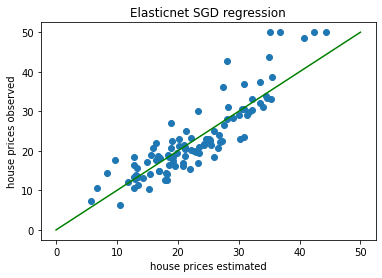

In [167]:
SGD.fit(X_tr, y_tr) # approximate after each SGD
score = mean_squared_error(y_t, SGD.predict(X_t))
Pred = SGD.predict(X_t)
plt.scatter(Pred,y_t)
plt.title("Elasticnet SGD regression")
plt.xlabel('house prices estimated')
plt.ylabel('house prices observed')
plt.plot([0, 50], [0, 50],color="green")
plt.show()

# Regression with SVR

Here we search :
$$\min\limits_{w,b}\frac{1}{2}\|w\|^2+ C\sum\limits max(0,|y_i-(<w,\phi(x_i)>+b)|-\epsilon)$$ 
and we have 
$$K(x_i,x_j)=<\phi(x_i),\phi(x_j)>$$

So, the aim is to find a function of $w,b$ which approximates the values $y_i$ and which is as simple as possible by penalizing on  $\|w\|$. So compare to SVC, the term $\frac{1}{2}\|w\|^2$  here is not the objective term but the penalisation term.


In [169]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn import datasets

boston = datasets.load_boston()
X,y = boston.data, boston.target
X_tr, X_t, y_tr, y_t = train_test_split(X, y, 
                                        test_size=0.3, 
                                        random_state=0)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_tr)
X_tr = scaling.transform(X_tr)
X_t  = scaling.transform(X_t)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [170]:
# SVR optimisation
svr = SVR()
search_space = [{'kernel': ['linear'], 
                 'C': np.logspace(-3, 2, 6), 
                 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]},
                {'kernel': ['rbf'], 
                 'C':np.logspace(-3, 3, 7), 
                 'gamma': np.logspace(-3, 2, 6), 
                 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]}]
gridsearch = GridSearchCV(svr, 
                          param_grid=search_space, 
                          refit=True, #recalibrate with the best found hyperparameters
                          scoring= 'r2',
                          cv=10, n_jobs=-1) # use the max number of available cores
gridsearch.fit(X_tr, y_tr)
cv = gridsearch.best_score_ # best average cross_validated score
test_score = gridsearch.score(X_t, y_t)
print('CV R2 score: %0.3f' % cv) 
print('Test R2 score: %0.3f' % test_score)
print('Best parameters: %s' % gridsearch.best_params_)

CV R2 score: 0.869
Test R2 score: 0.834
Best parameters: {'C': 1000.0, 'epsilon': 2, 'gamma': 0.1, 'kernel': 'rbf'}


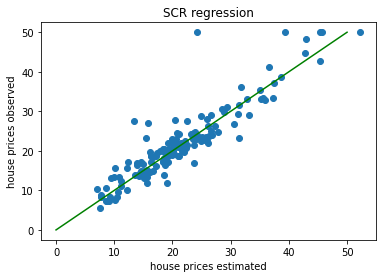

In [173]:
Pred=gridsearch.predict(X_t)
plt.scatter(Pred,y_t)
plt.title("SCR regression")
plt.xlabel('house prices estimated')
plt.ylabel('house prices observed')
plt.plot([0, 50], [0, 50],color="green")
plt.show()

# Classification with SVC

https://scikit-learn.org/stable/modules/svm.html

https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

https://scikit-learn.org/stable/modules/svm.html#svm-classification


Here we search
$$\min\limits_{w,b}\frac{1}{2}\|w\|^2+ C\sum\limits max(0,1-y_i(<w,\phi(x_i)>+b))$$ 

For C-SVMs the accuracy is calculated after classifying all the points, including those who are within the margins of the hyperplane. The function
$$l(y,\hat{y})=max(0,1-y\hat{y}) $$ is called the hinge loss function.

## Digits data set

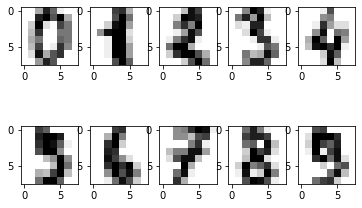

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))


In [193]:
from sklearn import datasets
digits = datasets.load_digits()
X, y = digits.data, digits.target # X is np(1797,64) and y is np(1787,)
import matplotlib.pyplot as plt
%matplotlib inline
# print digits.images which is a np(1797,8,8)
for k,img in enumerate(range(10)):
    plt.subplot(2, 5, k+1)
    plt.imshow(digits.images[img], # print np.array(8,8) as images
               cmap='binary', 
               interpolation='none')
plt.show()
import numpy as np
z=np.unique(y, return_counts=True) # tuple of the frequencies of the values taken by y 
print(z)

In [194]:
# By default C is fixed equal to 1 
# so there is no hyperparameter to adjust
# Cross Validation sets are used as test sets to check how the prediction error varies
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
X_tr, X_t, y_tr, y_t = train_test_split(X, y, 
                                        test_size= 0.3,
                                      random_state=0)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_tr) # calculate the renormalisation parameters
X_tr = scaling.transform(X_tr) # renormalise X_tr (with the renormalisation parameters derived from X_tr)
X_t = scaling.transform(X_t)# renormalise X_t (with the renormalisation parameters derived from X_tr)

svc = SVC(kernel='linear', 
          class_weight='balanced',C=1) # C is 1 by default
cv = cross_val_score(svc, X_tr, y_tr, cv=10) #cross validation on the training set by 10-fold
test_score = svc.fit(X_tr, y_tr).score(X_t, y_t)
print('CV average accuracy score: %0.3f' % np.mean(cv)) # average cross validation score 
print('CV stdev score: %0.3f' % np.std(cv)) # average cross validation score
print('Test accuracy score: %0.3f' % (test_score)) # score sur le test set

CV average accuracy score: 0.981
CV stdev score: 0.012
Test accuracy score: 0.976


In [195]:
# The search of C can be made by GridSearch
from sklearn.model_selection  import GridSearchCV
svc = SVC(class_weight='balanced', random_state=1) # random state to obtain the same split each time
search_space = {'C': np.logspace(-3, 3, 7)} # defined as a dictionary
gridsearch = GridSearchCV(svc, 
                          param_grid=search_space, 
                          scoring='accuracy', 
                          refit=True, cv=10) # the model is refit with the optimised parameters
                          # based on 10-folds cross validation results
gridsearch.fit(X_tr,y_tr)
cv = gridsearch.best_score_ # 
test_score = gridsearch.score(X_t, y_t) #score using the optimised parameters from gridsearch on the test set
best_c =  gridsearch.best_params_['C']
print('CV accuracy score: %.3f' % cv) #average, with the best parameters, of the score of the leftouts 
print('Test accuracy score: %.3f' % test_score)
print('Best C parameter: %.1f' % best_c)

CV accuracy score: 0.990
Test accuracy score: 0.993
Best C parameter: 10.0


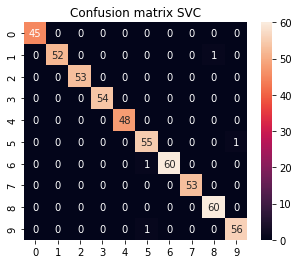

In [196]:
# Confusion matrix for multiclasses
import seaborn as sns
from sklearn.metrics import confusion_matrix
Pred=gridsearch.predict(X_t)
cm = confusion_matrix(Pred, y_t)
cm_df = pd.DataFrame(cm,
                     index = np.arange(10), 
                    columns = np.arange(10))
plt.figure(figsize=(5,4))
plt.title("Confusion matrix SVC")
sns.heatmap(cm_df, annot=True)
plt.show()

## Gridsearch and Kfold





In [197]:
# The hypermaters are searched with GridSearch based on the
# results of the cross validation
# the choise of the kernel is also considered as an hyperparameter
from sklearn.model_selection import GridSearchCV
svc = SVC(class_weight='balanced', random_state=1)
search_space = [{'kernel': ['linear'], 
                 'C': np.logspace(-3, 3, 7)},
                {'kernel': ['rbf'], 
                 'C':np.logspace(-3, 3, 7), 
                 'gamma': np.logspace(-3, 2, 6)}] #The gamma parameter is the inverse of the standard 
                 # deviation of the RBF kernel
gridsearch = GridSearchCV(svc, 
                          param_grid=search_space, 
                          scoring='accuracy', 
                          refit=True, cv=10,
                          n_jobs=-1) # njobs = -1 means you want to use all the available cores 
                          # for parallel processing
gridsearch.fit(X_tr, y_tr) # calibrations for the various hyperparameters
cv = gridsearch.best_score_ # best score obtained on the average of the K_fold test sets
test_score = gridsearch.score(X_t, y_t)
print('CV accuracy best score: %0.3f' % cv)
print('Accuracy score on the test set: %0.3f' % test_score)
print('Best hyper-parameters: %s' % gridsearch.best_params_)

CV accuracy best score: 0.990
Accuracy score on the test set: 0.993
Best hyper-parameters: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


## Visualisation Binary

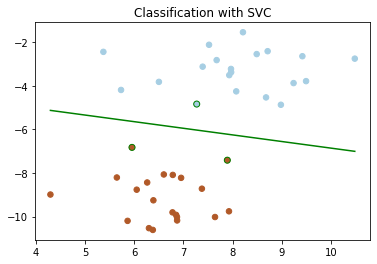

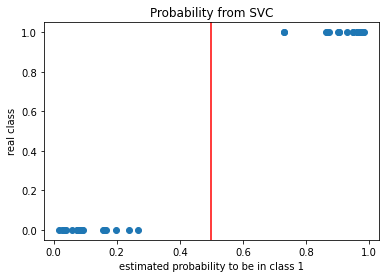

In [221]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=40, centers=2, random_state=6) #generate 40 random points
# X contains the coordinates and y the class 
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) # plot the points
# cmap associates a color to a number

# plot support vectors
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],facecolors='none',edgecolors='g') # plot the support vectors for the two classes

# separating hyperplane
a=clf.coef_[0,0] 
b=clf.coef_[0,1]
c=clf.intercept_[0]
x1=np.min(X[:,0])
x2=np.max(X[:,0])
z1=(-a*x1-c)/b
z2=(-a*x2-c)/b
plt.plot([x1, x2], [z1, z2],color="green")
plt.title('Classification with SVC')
plt.show()

# probability associated to the points and representation
import numpy as np 
def sig(x):
 return 1/(1 + np.exp(-x))
z=clf.decision_function(X) #logit probability to be in class 1
Pred= sig(z)
plt.scatter(Pred,y)
plt.xlabel("estimated probability to be in class 1")
plt.ylabel("real class")
plt.axvline(x = 0.5, color = 'r')
plt.title("Probability from SVC")
plt.show()
# Other functions:
# clf.predict(X) # prediction of the class for an observation
# clf.coef_ # coeff de w
# clf.intercept_ #valeur de b

# Comparing SVM algorithms

We compare here SVC with Linear SVC from sklearn

### SVC against LinearSVC

In [199]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
X,y = make_classification(n_samples=10**4, 
                          n_features=15, 
                          n_informative=10, 
                          random_state=101) # create an example
X_tr, X_t, y_tr, y_t = train_test_split(X, y, 
                                        test_size=0.3, 
                                        random_state=1)

from sklearn.svm import SVC, LinearSVC
svc = SVC(kernel='linear', random_state=1)
linear = LinearSVC(loss='hinge', random_state=1)# the hinge loss function as for effect to classify

svc.fit(X_tr, y_tr)
linear.fit(X_tr, y_tr)
svc_score = svc.score(X_t, y_t)
libsvc_score = linear.score(X_t, y_t)
print('SVC test accuracy: %0.3f' % svc_score)
print('LinearSVC test accuracy: %0.3f' % libsvc_score)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVC test accuracy: 0.803
LinearSVC test accuracy: 0.805


In [200]:
import timeit
X,y = make_classification(n_samples=10**4, 
                          n_features=15, 
                          n_informative=10, 
                          random_state=101)
t_svc = timeit.timeit('svc.fit(X, y)',
                      'from __main__ import svc, X, y', 
                      number=1) # measure time to do it once
t_libsvc = timeit.timeit('linear.fit(X, y)',
                         'from __main__ import linear, X, y', 
                         number=1) # measure time to do it once
print('best avg secs for SVC: %0.1f' % np.mean(t_svc))
print('best avg secs for LinearSVC: %0.1f' % np.mean(t_libsvc))

best avg secs for SVC: 12.4
best avg secs for LinearSVC: 0.2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### SGD applied to classification models

In [202]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge',
                    max_iter=100, 
                    shuffle=True, 
                    random_state=101)
sgd.fit(X_tr, y_tr)
score = sgd.score(X_t, y_t)
t = timeit.timeit("sgd.fit(X_tr, y_tr)", 
                  "from __main__ import sgd, X_tr, y_tr", 
                  number=1)
print('SGDClassifier test accuracy: %0.3f' % score)
print('Avg time for SGDClassifier: %0.1f secs' % np.mean(t))

SGDClassifier test accuracy: 0.769
Avg time for SGDClassifier: 0.1 secs


# Neural networks

In [203]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.neural_network import MLPClassifier

In [204]:
digits = datasets.load_digits()
X, y = digits.data, digits.target
X_tr, X_t, y_tr, y_t = train_test_split(X, y, 
                                        test_size=0.3, 
                                        random_state=0)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_tr)
X_tr = scaling.transform(X_tr)
X_t = scaling.transform(X_t)

In [205]:
nn = MLPClassifier(hidden_layer_sizes=(512, ), 
                   activation='relu', 
                   solver='adam',
                   shuffle=True,
                   tol=1e-4,
                   random_state=1)

In [206]:
cv = cross_val_score(nn, X_tr, y_tr, cv=10)
test_score = nn.fit(X_tr, y_tr).score(X_t, y_t)
print('CV accuracy score: %0.3f' % np.mean(cv))
print('Test accuracy score: %0.3f' % (test_score))

CV accuracy score: 0.979
Test accuracy score: 0.981
